In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("Chelsea Bridge Final.csv")

In [3]:
#Converting 4 date time columns into datetime
df['Start Time'] = pd.to_datetime(df['Start Time'])
df['End Time'] = pd.to_datetime(df['End Time'])
df['ETA Bridge'] = pd.to_datetime(df['ETA Bridge'])
df['Email Sent'] = pd.to_datetime(df['Email Sent'])


df.dtypes


Vehicle  ID                object
Lift ID                   float64
Vessel(s)                  object
ETA Bridge         datetime64[ns]
Direction                  object
Email Sent         datetime64[ns]
Advanced Notice            object
2 Hours Notice?            object
Start Time         datetime64[ns]
End Time           datetime64[ns]
Duration                   object
Direction.1                object
Vessel(s).1                object
dtype: object

In [4]:
#Create a new column to find the difference between predicted and actual time
df['Predict Error'] =  df['ETA Bridge'] - df['Start Time']
df[df['Predict Error']>'00:00:00']

,Vehicle ID,Lift ID,Vessel(s),ETA Bridge,Direction,Email Sent,Advanced Notice,2 Hours Notice?,Start Time,End Time,Duration,Direction.1,Vessel(s).1,Predict Error
0,19002,NaN,1 TUG / BARGE,2019-05-06 15:30:00,IN,2019-05-06 05:56:00,9:34,ACCEPTABLE,2019-05-06 15:12:00,2019-05-06 15:30:00,0:18,IN,Freedom / Christian Reiner / RTC 145,0 days 00:18:00
1,19002,NaN,1 TUG,2019-05-06 16:30:00,OUT,2019-05-06 05:56:00,10:34,ACCEPTABLE,2019-05-06 16:02:00,2019-05-06 16:20:00,0:18,OUT,Freedom,0 days 00:28:00
2,19002,NaN,1 TUG,2019-05-07 18:30:00,IN,2019-05-07 04:08:00,14:22,ACCEPTABLE,2019-05-07 17:52:00,2019-05-07 18:06:00,0:14,IN,Freedom / DBL 104 / Denali,0 days 00:38:00
3,19002,NaN,1 TUG / BARGE,2019-05-07 19:00:00,OUT,2019-05-07 04:08:00,14:52,ACCEPTABLE,2019-05-07 18:25:00,2019-05-07 18:38:00,0:13,OUT,Freedom / DBL 104 / Denali,0 days 00:35:00
4,19003,NaN,1 TUG / BARGE,2019-05-07 19:45:00,IN,2019-05-07 04:08:00,15:37,ACCEPTABLE,2019-05-07 18:55:00,2019-05-07 19:10:00,0:15,IN,Freedom,0 days 00:50:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2866,20440,2876.0,3 TUGS / TANKER,2021-08-10 05:35:00,OUT,2021-08-10 05:13:00,0:22,TOO LATE,2021-08-10 05:30:00,2021-08-10 05:45:00,0:15,OUT,Freedom/ Justice / Liberty / Nor Easter,0 days 00:05:00
2867,20441,2877.0,1 TUG / BARGE,2021-08-10 07:05:00,IN,2021-08-10 05:13:00,1:52,ACCEPTABLE,2021-08-10 06:35:00,2021-08-10 06:52:00,0:17,IN,RTC 82 / Franklin Reinauer / Freedom,0 days 00:30:00
2868,20441,2878.0,1 TUG / BARGE,2021-08-10 07:40:00,OUT,2021-08-10 05:13:00,2:27,ACCEPTABLE,2021-08-10 07:19:00,2021-08-10 07:40:00,0:21,OUT,RTC 82 / Franklin Reinauer / Freedom/ RTC 105 ...,0 days 00:21:00
2869,20442,2880.0,1 TUG / BARGE,2021-08-11 20:00:00,OUT,2021-08-11 14:25:00,5:35,ACCEPTABLE,2021-08-11 19:43:00,2021-08-11 19:56:00,0:13,OUT,Nicole Reinauer / Justice / RTC 135,0 days 00:17:00


In [5]:
df[df['Predict Error'] < "0 days"]['Predict Error']#.dt.seconds

14     -1 days +23:36:00
16     -1 days +23:54:00
17     -1 days +23:35:00
18     -1 days +23:36:00
20     -1 days +23:35:00
              ...       
2858   -1 days +23:35:00
2859   -1 days +23:06:00
2860   -1 days +23:00:00
2862   -1 days +23:47:00
2863   -1 days +23:30:00
Name: Predict Error, Length: 1300, dtype: timedelta64[ns]

In [6]:
df.groupby('Direction')['Predict Error'].describe()


,count,mean,std,min,25%,50%,75%,max
Direction,,,,,,,,
IN,1397,0 days 00:06:54.244810307,0 days 04:18:18.699735836,-2 days +23:30:00,-1 days +23:52:00,0 days 00:02:00,0 days 00:11:00,4 days 23:55:00
IN,36,0 days 00:01:46.666666666,0 days 00:30:03.830844144,-1 days +21:42:00,0 days 00:00:00,0 days 00:10:00,0 days 00:12:30,0 days 00:42:00
IN / OUT,4,0 days 00:17:00,0 days 00:27:36.260849021,-1 days +23:50:00,-1 days +23:56:45,0 days 00:14:00,0 days 00:34:15,0 days 00:50:00
IN /OUT,1,0 days 00:20:00,NaT,0 days 00:20:00,0 days 00:20:00,0 days 00:20:00,0 days 00:20:00,0 days 00:20:00
IN/ OUT,3,0 days 00:19:40,0 days 00:23:01.738035953,0 days 00:00:00,0 days 00:07:00,0 days 00:14:00,0 days 00:29:30,0 days 00:45:00
IN/OUT,1,0 days 00:17:00,NaT,0 days 00:17:00,0 days 00:17:00,0 days 00:17:00,0 days 00:17:00,0 days 00:17:00
OUT,1404,-1 days +23:51:02.905982906,0 days 02:54:13.071511403,-2 days +23:03:00,-1 days +23:45:00,-1 days +23:59:00,0 days 00:10:00,3 days 00:10:00
OUT,1,-1 days +23:37:00,NaT,-1 days +23:37:00,-1 days +23:37:00,-1 days +23:37:00,-1 days +23:37:00,-1 days +23:37:00
in,1,0 days 00:10:00,NaT,0 days 00:10:00,0 days 00:10:00,0 days 00:10:00,0 days 00:10:00,0 days 00:10:00


In [7]:
df.groupby(['Vessel(s)'])['Predict Error'].mean()

Vessel(s)
 1 TUG                                     -1 days +23:48:00
 1 TUG / BARGE                               0 days 00:00:00
 3 TUG                                       0 days 00:18:30
1 BARGE                                      0 days 00:12:00
1 TUG                              0 days 00:04:30.401069518
1 TUG                                        0 days 00:02:28
1 TUG / 1 BARGE                    0 days 00:12:20.465116279
1 TUG / 1 BARGE\n3 TUGS                    -1 days +23:59:00
1 TUG / 1 BARGE OUT\n3 TUGS IN               0 days 00:29:00
1 TUG / 1 TANKER                             0 days 00:04:00
1 TUG / BARGE                    -1 days +23:48:17.531914894
1 TUG / BARGE                    -1 days +23:57:20.540540541
1 TUG                                        0 days 00:01:00
1TUG                                         0 days 00:16:00
2 TUG                              0 days 00:07:11.559633027
2 TUG / 1 BARGE                            -1 days +23:45:00
2 TUG / 2 BARG

In [8]:
df.describe()

,Lift ID,Predict Error
count,2672.000000,2871
mean,1422.845060,-1 days +23:59:00.480668757
std,822.514817,0 days 03:37:39.285910021
min,1.000000,-2 days +23:03:00
25%,713.750000,-1 days +23:48:00
50%,1418.500000,0 days 00:00:00
75%,2136.250000,0 days 00:10:00
max,2881.000000,4 days 23:55:00


In [9]:
df.loc[2079,]

Vehicle  ID                      20291
Lift ID                         2013.0
Vessel(s)                        1 TUG
ETA Bridge         2020-11-25 04:40:00
Direction                           IN
Email Sent         2020-11-24 19:34:00
Advanced Notice                   9:06
2 Hours Notice?             ACCEPTABLE
Start Time         2020-11-20 04:45:00
End Time           2020-11-20 05:00:00
Duration                          0:15
Direction.1                         IN
Vessel(s).1           Zachery Reinauer
Predict Error          4 days 23:55:00
Name: 2079, dtype: object

In [10]:
df['Notice Time'] = df['Email Sent'] - df['Start Time']
df[df['2 Hours Notice?'] == 'TOO LATE']['Notice Time']
df[df['Advanced Notice'] == '1:00']

,Vehicle ID,Lift ID,Vessel(s),ETA Bridge,Direction,Email Sent,Advanced Notice,2 Hours Notice?,Start Time,End Time,Duration,Direction.1,Vessel(s).1,Predict Error,Notice Time
439,19138,263.0,1 TUG,2019-08-20 06:00:00,IN,2019-08-19 05:00:00,1:00,ACCEPTABLE,2019-08-20 05:45:00,2019-08-20 06:00:00,0:15,IN,Liberty,0 days 00:15:00,-2 days +23:15:00
1152,20036,1009.0,1 TUG,2020-02-05 04:05:00,IN,2020-02-05 03:05:00,1:00,ACCEPTABLE,2020-02-05 03:45:00,2020-02-05 03:50:00,0:05,IN,Freedom,0 days 00:20:00,-1 days +23:20:00
2845,20433,2852.0,1 TUG,2021-08-01 10:15:00,IN,2021-08-01 09:15:00,1:00,ACCEPTABLE,2021-08-01 10:47:00,2021-08-01 10:56:00,0:09,IN,Justice,-1 days +23:28:00,-1 days +22:28:00


In [11]:
df.iloc[[0,-1],]

,Vehicle ID,Lift ID,Vessel(s),ETA Bridge,Direction,Email Sent,Advanced Notice,2 Hours Notice?,Start Time,End Time,Duration,Direction.1,Vessel(s).1,Predict Error,Notice Time
0,19002,NaN,1 TUG / BARGE,2019-05-06 15:30:00,IN,2019-05-06 05:56:00,9:34,ACCEPTABLE,2019-05-06 15:12:00,2019-05-06 15:30:00,0:18,IN,Freedom / Christian Reiner / RTC 145,0 days 00:18:00,-1 days +14:44:00
2870,20443,2881.0,1 TUG / BARGE,2021-08-11 22:30:00,IN,2021-08-11 14:25:00,8:05,ACCEPTABLE,2021-08-11 21:55:00,2021-08-11 22:08:00,0:13,OUT,Nicole Reinauer / Justice / RTC 103,0 days 00:35:00,-1 days +16:30:00


### Bringing weather data from 2019-05-06 to 2021-08-11

##### Data Cleaning

In [12]:
w_df = pd.read_csv('boston 2019-05-06 to 2021-08-11.csv')
w_df.shape

(829, 33)

In [13]:
#Dropping columnes with all null values precipprob, preciptype, solarradiation, solarenergy, severerisk.
w_df.isnull().sum()
w_df_clean = w_df.dropna(how='all', axis=1).copy()
w_df_clean.columns

Index(['name', 'datetime', 'tempmax', 'tempmin', 'temp', 'feelslikemax',
       'feelslikemin', 'feelslike', 'dew', 'humidity', 'precip', 'precipcover',
       'snow', 'snowdepth', 'windgust', 'windspeed', 'winddir',
       'sealevelpressure', 'cloudcover', 'visibility', 'uvindex', 'sunrise',
       'sunset', 'moonphase', 'conditions', 'description', 'icon', 'stations'],
      dtype='object')

In [14]:
w_df_clean.isnull().sum()

name                  0
datetime              0
tempmax               0
tempmin               0
temp                  0
feelslikemax          0
feelslikemin          0
feelslike             0
dew                   0
humidity              0
precip                0
precipcover           0
snow                  0
snowdepth             0
windgust            131
windspeed             0
winddir               0
sealevelpressure      0
cloudcover            0
visibility            0
uvindex               0
sunrise               0
sunset                0
moonphase             0
conditions            0
description           0
icon                  0
stations              0
dtype: int64

In [15]:
w_df_clean.describe()

,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,precipcover,snow,snowdepth,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,uvindex,moonphase
count,829.000000,829.000000,829.000000,829.000000,829.000000,829.000000,829.000000,829.000000,829.000000,829.000000,829.000000,829.000000,698.000000,829.000000,829.000000,829.000000,829.000000,829.000000,829.0,829.000000
mean,62.439324,48.489023,55.256454,61.032690,44.400241,52.554644,41.882147,63.494089,0.121749,12.222014,0.085476,0.629916,28.278367,17.766104,206.963932,1015.944511,57.114475,9.172738,0.0,0.499517
std,17.739547,16.083889,16.547234,20.522929,20.376474,20.105871,18.035072,15.347125,0.298856,20.322189,0.547978,2.185969,7.696937,5.898900,67.415326,7.797150,22.378426,1.428465,0.0,0.308433
min,17.100000,6.900000,13.000000,1.100000,-14.600000,-5.300000,-6.100000,25.640000,0.000000,0.000000,0.000000,0.000000,16.100000,6.800000,28.700000,983.900000,1.100000,2.600000,0.0,0.000000
25%,47.200000,35.500000,41.400000,43.400000,27.500000,35.100000,28.100000,52.200000,0.000000,0.000000,0.000000,0.000000,22.600000,13.700000,165.000000,1010.800000,39.800000,9.300000,0.0,0.250000
50%,63.000000,48.900000,56.200000,63.000000,45.300000,56.000000,43.600000,63.710000,0.000000,0.000000,0.000000,0.000000,26.500000,16.800000,213.800000,1015.700000,55.100000,9.900000,0.0,0.500000
75%,76.800000,62.900000,69.000000,76.800000,62.900000,69.100000,57.800000,75.160000,0.080000,16.670000,0.000000,0.000000,32.200000,20.600000,257.700000,1021.100000,74.700000,9.900000,0.0,0.750000
max,98.000000,82.900000,89.800000,107.300000,86.500000,98.100000,74.300000,96.060000,2.010000,100.000000,8.120000,14.170000,73.200000,76.900000,343.600000,1038.400000,100.000000,9.900000,0.0,1.000000


In [16]:
w_df_clean.head()

,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,cloudcover,visibility,uvindex,sunrise,sunset,moonphase,conditions,description,icon,stations
0,boston,2019-05-06,57.9,48.6,52.4,57.9,43.5,50.7,43.9,73.29,...,51.1,9.9,0,2019-05-06T05:33:16,2019-05-06T19:49:09,0.01,Partially cloudy,Clearing in the afternoon.,partly-cloudy-day,"KOWD,72509854704,KMQE,KBOS,72509014739,7250591..."
1,boston,2019-05-07,73.1,45.9,60.1,73.1,43.4,59.3,45.4,60.28,...,39.0,9.7,0,2019-05-07T05:32:02,2019-05-07T19:50:14,0.04,"Rain, Partially cloudy",Becoming cloudy in the afternoon with late aft...,rain,"KOWD,72509854704,KMQE,KBOS,72509014739,7250591..."
2,boston,2019-05-08,61.9,52.0,56.8,61.9,52.0,56.8,44.8,64.87,...,40.0,9.9,0,2019-05-08T05:30:49,2019-05-08T19:51:20,0.07,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"KOWD,72509854704,KMQE,KBOS,72509014739,7250591..."
3,boston,2019-05-09,54.3,46.8,52.2,54.3,43.4,51.7,34.4,50.84,...,43.2,9.9,0,2019-05-09T05:29:38,2019-05-09T19:52:24,0.11,Partially cloudy,Clearing in the afternoon.,partly-cloudy-day,"KOWD,72509854704,KMQE,KBOS,72509014739,7250591..."
4,boston,2019-05-10,65.8,51.1,56.8,65.8,51.1,56.8,45.5,66.63,...,88.4,9.9,0,2019-05-10T05:28:28,2019-05-10T19:53:29,0.16,"Rain, Partially cloudy",Partly cloudy throughout the day with afternoo...,rain,"KOWD,72509854704,KMQE,KBED,KBOS,72509014739,72..."


In [17]:
#Set index to start time for easier indexing as .loc indexing can be partially indexed
time_index = df['Start Time']
print(time_index)
df_time = df.set_index(pd.DatetimeIndex(df['Start Time'])).copy()
df_time

0      2019-05-06 15:12:00
1      2019-05-06 16:02:00
2      2019-05-07 17:52:00
3      2019-05-07 18:25:00
4      2019-05-07 18:55:00
               ...        
2866   2021-08-10 05:30:00
2867   2021-08-10 06:35:00
2868   2021-08-10 07:19:00
2869   2021-08-11 19:43:00
2870   2021-08-11 21:55:00
Name: Start Time, Length: 2871, dtype: datetime64[ns]


,Vehicle ID,Lift ID,Vessel(s),ETA Bridge,Direction,Email Sent,Advanced Notice,2 Hours Notice?,Start Time,End Time,Duration,Direction.1,Vessel(s).1,Predict Error,Notice Time
Start Time,,,,,,,,,,,,,,,
2019-05-06 15:12:00,19002,NaN,1 TUG / BARGE,2019-05-06 15:30:00,IN,2019-05-06 05:56:00,9:34,ACCEPTABLE,2019-05-06 15:12:00,2019-05-06 15:30:00,0:18,IN,Freedom / Christian Reiner / RTC 145,0 days 00:18:00,-1 days +14:44:00
2019-05-06 16:02:00,19002,NaN,1 TUG,2019-05-06 16:30:00,OUT,2019-05-06 05:56:00,10:34,ACCEPTABLE,2019-05-06 16:02:00,2019-05-06 16:20:00,0:18,OUT,Freedom,0 days 00:28:00,-1 days +13:54:00
2019-05-07 17:52:00,19002,NaN,1 TUG,2019-05-07 18:30:00,IN,2019-05-07 04:08:00,14:22,ACCEPTABLE,2019-05-07 17:52:00,2019-05-07 18:06:00,0:14,IN,Freedom / DBL 104 / Denali,0 days 00:38:00,-1 days +10:16:00
2019-05-07 18:25:00,19002,NaN,1 TUG / BARGE,2019-05-07 19:00:00,OUT,2019-05-07 04:08:00,14:52,ACCEPTABLE,2019-05-07 18:25:00,2019-05-07 18:38:00,0:13,OUT,Freedom / DBL 104 / Denali,0 days 00:35:00,-1 days +09:43:00
2019-05-07 18:55:00,19003,NaN,1 TUG / BARGE,2019-05-07 19:45:00,IN,2019-05-07 04:08:00,15:37,ACCEPTABLE,2019-05-07 18:55:00,2019-05-07 19:10:00,0:15,IN,Freedom,0 days 00:50:00,-1 days +09:13:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-10 05:30:00,20440,2876.0,3 TUGS / TANKER,2021-08-10 05:35:00,OUT,2021-08-10 05:13:00,0:22,TOO LATE,2021-08-10 05:30:00,2021-08-10 05:45:00,0:15,OUT,Freedom/ Justice / Liberty / Nor Easter,0 days 00:05:00,-1 days +23:43:00
2021-08-10 06:35:00,20441,2877.0,1 TUG / BARGE,2021-08-10 07:05:00,IN,2021-08-10 05:13:00,1:52,ACCEPTABLE,2021-08-10 06:35:00,2021-08-10 06:52:00,0:17,IN,RTC 82 / Franklin Reinauer / Freedom,0 days 00:30:00,-1 days +22:38:00
2021-08-10 07:19:00,20441,2878.0,1 TUG / BARGE,2021-08-10 07:40:00,OUT,2021-08-10 05:13:00,2:27,ACCEPTABLE,2021-08-10 07:19:00,2021-08-10 07:40:00,0:21,OUT,RTC 82 / Franklin Reinauer / Freedom/ RTC 105 ...,0 days 00:21:00,-1 days +21:54:00


In [18]:
#Split Data Time columns into 3 seperate columns
df_time['Day'] = df_time['Start Time'].dt.day
df_time['Month'] = df_time['Start Time'].dt.month
df_time['Year'] = df_time['Start Time'].dt.year
df_time.head()

,Vehicle ID,Lift ID,Vessel(s),ETA Bridge,Direction,Email Sent,Advanced Notice,2 Hours Notice?,Start Time,End Time,Duration,Direction.1,Vessel(s).1,Predict Error,Notice Time,Day,Month,Year
Start Time,,,,,,,,,,,,,,,,,,
2019-05-06 15:12:00,19002,NaN,1 TUG / BARGE,2019-05-06 15:30:00,IN,2019-05-06 05:56:00,9:34,ACCEPTABLE,2019-05-06 15:12:00,2019-05-06 15:30:00,0:18,IN,Freedom / Christian Reiner / RTC 145,0 days 00:18:00,-1 days +14:44:00,6,5,2019
2019-05-06 16:02:00,19002,NaN,1 TUG,2019-05-06 16:30:00,OUT,2019-05-06 05:56:00,10:34,ACCEPTABLE,2019-05-06 16:02:00,2019-05-06 16:20:00,0:18,OUT,Freedom,0 days 00:28:00,-1 days +13:54:00,6,5,2019
2019-05-07 17:52:00,19002,NaN,1 TUG,2019-05-07 18:30:00,IN,2019-05-07 04:08:00,14:22,ACCEPTABLE,2019-05-07 17:52:00,2019-05-07 18:06:00,0:14,IN,Freedom / DBL 104 / Denali,0 days 00:38:00,-1 days +10:16:00,7,5,2019
2019-05-07 18:25:00,19002,NaN,1 TUG / BARGE,2019-05-07 19:00:00,OUT,2019-05-07 04:08:00,14:52,ACCEPTABLE,2019-05-07 18:25:00,2019-05-07 18:38:00,0:13,OUT,Freedom / DBL 104 / Denali,0 days 00:35:00,-1 days +09:43:00,7,5,2019
2019-05-07 18:55:00,19003,NaN,1 TUG / BARGE,2019-05-07 19:45:00,IN,2019-05-07 04:08:00,15:37,ACCEPTABLE,2019-05-07 18:55:00,2019-05-07 19:10:00,0:15,IN,Freedom,0 days 00:50:00,-1 days +09:13:00,7,5,2019


def merge_column(w_df,w_df_col,df):
    '''
    Returns the list of values from a specified column from the weather dataset correspond to the Bridge dataset.
    Bridge dataset must have DateTime index due to using partial mathching with .loc indexing.
    
    Params:
    ------------
    w_df: DataFrame
        the weather dataframe.
    w_df_col: str
        the specified column.
    df: DataFrame
        the Bridge df, must have DateTime as an index. 
    
    Returns
    -----------
    list
        a of list values correspond to the w_df_col'''
    
    res = []
    for time in w_df['datetime']:
        for i in range(len(df.loc[time])):
            res.append(w_df[w_df['datetime'] == time][w_df_col].values[0])
    return res

In [19]:
df_time.shape

(2871, 18)

In [20]:
#Merging weather df and bridge df using df.merge() for better effiency
#Create the column datetime first to merge with weather col data 
df_time['datetime'] = df_time['Start Time'].dt.strftime('%Y-%m-%d')
df_time = df_time.merge(w_df_clean.loc[:,['datetime','temp']],how='inner').copy()
df_time = df_time.set_index(pd.DatetimeIndex(df['Start Time'])).copy() #have to change index after merging because reseted
df_time

,Vehicle ID,Lift ID,Vessel(s),ETA Bridge,Direction,Email Sent,Advanced Notice,2 Hours Notice?,Start Time,End Time,Duration,Direction.1,Vessel(s).1,Predict Error,Notice Time,Day,Month,Year,datetime,temp
Start Time,,,,,,,,,,,,,,,,,,,,
2019-05-06 15:12:00,19002,NaN,1 TUG / BARGE,2019-05-06 15:30:00,IN,2019-05-06 05:56:00,9:34,ACCEPTABLE,2019-05-06 15:12:00,2019-05-06 15:30:00,0:18,IN,Freedom / Christian Reiner / RTC 145,0 days 00:18:00,-1 days +14:44:00,6,5,2019,2019-05-06,52.4
2019-05-06 16:02:00,19002,NaN,1 TUG,2019-05-06 16:30:00,OUT,2019-05-06 05:56:00,10:34,ACCEPTABLE,2019-05-06 16:02:00,2019-05-06 16:20:00,0:18,OUT,Freedom,0 days 00:28:00,-1 days +13:54:00,6,5,2019,2019-05-06,52.4
2019-05-07 17:52:00,19002,NaN,1 TUG,2019-05-07 18:30:00,IN,2019-05-07 04:08:00,14:22,ACCEPTABLE,2019-05-07 17:52:00,2019-05-07 18:06:00,0:14,IN,Freedom / DBL 104 / Denali,0 days 00:38:00,-1 days +10:16:00,7,5,2019,2019-05-07,60.1
2019-05-07 18:25:00,19002,NaN,1 TUG / BARGE,2019-05-07 19:00:00,OUT,2019-05-07 04:08:00,14:52,ACCEPTABLE,2019-05-07 18:25:00,2019-05-07 18:38:00,0:13,OUT,Freedom / DBL 104 / Denali,0 days 00:35:00,-1 days +09:43:00,7,5,2019,2019-05-07,60.1
2019-05-07 18:55:00,19003,NaN,1 TUG / BARGE,2019-05-07 19:45:00,IN,2019-05-07 04:08:00,15:37,ACCEPTABLE,2019-05-07 18:55:00,2019-05-07 19:10:00,0:15,IN,Freedom,0 days 00:50:00,-1 days +09:13:00,7,5,2019,2019-05-07,60.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-10 05:30:00,20440,2876.0,3 TUGS / TANKER,2021-08-10 05:35:00,OUT,2021-08-10 05:13:00,0:22,TOO LATE,2021-08-10 05:30:00,2021-08-10 05:45:00,0:15,OUT,Freedom/ Justice / Liberty / Nor Easter,0 days 00:05:00,-1 days +23:43:00,10,8,2021,2021-08-10,70.5
2021-08-10 06:35:00,20441,2877.0,1 TUG / BARGE,2021-08-10 07:05:00,IN,2021-08-10 05:13:00,1:52,ACCEPTABLE,2021-08-10 06:35:00,2021-08-10 06:52:00,0:17,IN,RTC 82 / Franklin Reinauer / Freedom,0 days 00:30:00,-1 days +22:38:00,10,8,2021,2021-08-10,70.5
2021-08-10 07:19:00,20441,2878.0,1 TUG / BARGE,2021-08-10 07:40:00,OUT,2021-08-10 05:13:00,2:27,ACCEPTABLE,2021-08-10 07:19:00,2021-08-10 07:40:00,0:21,OUT,RTC 82 / Franklin Reinauer / Freedom/ RTC 105 ...,0 days 00:21:00,-1 days +21:54:00,10,8,2021,2021-08-10,70.5


In [21]:
w_df.shape

(829, 33)

In [22]:
#The 123 dates that are not included within 2019-05-06 to 2021-08-11
w_df[~w_df['datetime'].isin(df_time['datetime'].drop_duplicates())]['datetime']

8      2019-05-14
15     2019-05-21
16     2019-05-22
34     2019-06-09
50     2019-06-25
          ...    
799    2021-07-13
800    2021-07-14
809    2021-07-23
820    2021-08-03
825    2021-08-08
Name: datetime, Length: 123, dtype: object

In [23]:
df_time['Vessel(s)'].value_counts()

1 TUG                             748
1 TUG / BARGE                     705
3 TUGS / TANKER                   418
3 TUG                             382
1 TUG / 1 BARGE                   129
1 TUG / BARGE                     111
2 TUG                             109
3 TUG / TANKER                     55
3 TUGS                             51
WORK BARGE / BOAT                  30
WORK BARGE/BOAT                    26
1 TUG                              15
2 TUG / BARGE                      13
2 TUGS                             12
3 TUG / BARGE                       7
3 TUG                               7
3 TUG / 1 BARGE                     6
4 TUG                               4
2 TUGS / TANKER                     3
1TUG                                2
3 TUGS / BARGE                      2
BOAT                                2
 3 TUG                              2
2 WORK BARGE/BOAT                   2
2 TUG / 1 BARGE                     1
2 TUGS / 2 BARGES                   1
3 TUG/ TANKE

In [24]:
#Note on Exact time indexing
df_time['Start Time'].isin(w_df_clean['datetime'])

Start Time
2019-05-06 15:12:00    False
2019-05-06 16:02:00    False
2019-05-07 17:52:00    False
2019-05-07 18:25:00    False
2019-05-07 18:55:00    False
                       ...  
2021-08-10 05:30:00    False
2021-08-10 06:35:00    False
2021-08-10 07:19:00    False
2021-08-11 19:43:00    False
2021-08-11 21:55:00    False
Name: Start Time, Length: 2871, dtype: bool

In [25]:
#The count of days per month
df_time.groupby(pd.Grouper(key='Start Time',freq='1m'))['datetime'].nunique()

Start Time
2019-05-31    23
2019-06-30    28
2019-07-31    26
2019-08-31    31
2019-09-30    29
2019-10-31    27
2019-11-30    28
2019-12-31    29
2020-01-31    30
2020-02-29    26
2020-03-31    30
2020-04-30    22
2020-05-31    24
2020-06-30    26
2020-07-31    24
2020-08-31    26
2020-09-30    23
2020-10-31    26
2020-11-30    26
2020-12-31    25
2021-01-31    26
2021-02-28    22
2021-03-31    23
2021-04-30    28
2021-05-31    25
2021-06-30    27
2021-07-31    17
2021-08-31     9
Freq: M, Name: datetime, dtype: int64

In general we have good counts of days in a month except for the last 2 months July 2021, and Auguest 2021

In [26]:
df_time.groupby(pd.Grouper(key='Start Time',freq='1m'))['temp'].describe()

,count,mean,std,min,25%,50%,75%,max
Start Time,,,,,,,,
2019-05-31,106.0,59.683019,6.896590,47.8,56.300,61.10,64.025,73.9
2019-06-30,131.0,67.805344,5.048218,56.7,64.700,68.00,71.600,76.7
2019-07-31,121.0,78.621488,4.673707,71.1,75.200,79.00,81.000,89.8
2019-08-31,140.0,74.045714,5.013225,64.6,70.750,75.40,77.600,82.5
2019-09-30,134.0,67.467164,4.293092,57.7,65.200,67.20,70.275,78.6
2019-10-31,131.0,57.826718,5.160632,49.9,54.000,57.60,59.900,72.7
2019-11-30,127.0,41.741732,7.217763,26.4,35.500,42.60,47.800,58.1
2019-12-31,120.0,36.137500,7.188776,20.4,31.900,35.10,38.875,57.3
2020-01-31,126.0,37.396825,10.743764,20.1,28.500,38.25,42.400,62.2


## Working on tide DF

In [27]:
#DF concat
tide_df_1 = pd.read_csv("2019-05-06 to 2020-05-05 tide data.csv")
tide_df_2 = pd.read_csv("2020-05-06 to 2021-05-05 tide data.csv")
tide_df_3 = pd.read_csv("2021-05-06 to end tide data.csv")
tide_df = pd.concat([tide_df_1,tide_df_2,tide_df_3],axis=0)
tide_df

,Date,Time (GMT),Predicted (ft),Preliminary (ft),Verified (ft)
0,2019/05/06,00:00,2.163,-,2.90
1,2019/05/06,01:00,4.335,-,4.97
2,2019/05/06,02:00,6.669,-,7.22
3,2019/05/06,03:00,8.840,-,9.70
4,2019/05/06,04:00,10.286,-,11.04
...,...,...,...,...,...
2347,2021/08/11,19:00,9.503,-,10.08
2348,2021/08/11,20:00,7.959,-,8.35
2349,2021/08/11,21:00,5.763,-,6.30
2350,2021/08/11,22:00,3.417,-,4.04


In [28]:
#Dropping useless column
tide_df.drop('Preliminary (ft)',axis=1,inplace=True)

In [29]:
tide_df['date_time']=tide_df['Date'] + " " + tide_df['Time (GMT)']
tide_df['date_time'] = pd.to_datetime(tide_df['date_time'])
tide_df['timehour'] = tide_df['date_time'].dt.strftime("%Y-%m-%d %H")
tide_df

,Date,Time (GMT),Predicted (ft),Verified (ft),date_time,timehour
0,2019/05/06,00:00,2.163,2.90,2019-05-06 00:00:00,2019-05-06 00
1,2019/05/06,01:00,4.335,4.97,2019-05-06 01:00:00,2019-05-06 01
2,2019/05/06,02:00,6.669,7.22,2019-05-06 02:00:00,2019-05-06 02
3,2019/05/06,03:00,8.840,9.70,2019-05-06 03:00:00,2019-05-06 03
4,2019/05/06,04:00,10.286,11.04,2019-05-06 04:00:00,2019-05-06 04
...,...,...,...,...,...,...
2347,2021/08/11,19:00,9.503,10.08,2021-08-11 19:00:00,2021-08-11 19
2348,2021/08/11,20:00,7.959,8.35,2021-08-11 20:00:00,2021-08-11 20
2349,2021/08/11,21:00,5.763,6.30,2021-08-11 21:00:00,2021-08-11 21
2350,2021/08/11,22:00,3.417,4.04,2021-08-11 22:00:00,2021-08-11 22


In [30]:
#Add new column to merge then merge Predicted and Verified tide.
df_time['timehour']= df_time['Start Time'].dt.strftime("%Y-%m-%d %H")
df_time = df_time.merge(tide_df.loc[:,['timehour','Predicted (ft)','Verified (ft)']])
df_time

,Vehicle ID,Lift ID,Vessel(s),ETA Bridge,Direction,Email Sent,Advanced Notice,2 Hours Notice?,Start Time,End Time,...,Predict Error,Notice Time,Day,Month,Year,datetime,temp,timehour,Predicted (ft),Verified (ft)
0,19002,NaN,1 TUG / BARGE,2019-05-06 15:30:00,IN,2019-05-06 05:56:00,9:34,ACCEPTABLE,2019-05-06 15:12:00,2019-05-06 15:30:00,...,0 days 00:18:00,-1 days +14:44:00,6,5,2019,2019-05-06,52.4,2019-05-06 15,6.859,7.52
1,19002,NaN,1 TUG,2019-05-06 16:30:00,OUT,2019-05-06 05:56:00,10:34,ACCEPTABLE,2019-05-06 16:02:00,2019-05-06 16:20:00,...,0 days 00:28:00,-1 days +13:54:00,6,5,2019,2019-05-06,52.4,2019-05-06 16,8.758,9.49
2,19002,NaN,1 TUG,2019-05-07 18:30:00,IN,2019-05-07 04:08:00,14:22,ACCEPTABLE,2019-05-07 17:52:00,2019-05-07 18:06:00,...,0 days 00:38:00,-1 days +10:16:00,7,5,2019,2019-05-07,60.1,2019-05-07 17,9.066,9.49
3,19002,NaN,1 TUG / BARGE,2019-05-07 19:00:00,OUT,2019-05-07 04:08:00,14:52,ACCEPTABLE,2019-05-07 18:25:00,2019-05-07 18:38:00,...,0 days 00:35:00,-1 days +09:43:00,7,5,2019,2019-05-07,60.1,2019-05-07 18,9.622,10.07
4,19003,NaN,1 TUG / BARGE,2019-05-07 19:45:00,IN,2019-05-07 04:08:00,15:37,ACCEPTABLE,2019-05-07 18:55:00,2019-05-07 19:10:00,...,0 days 00:50:00,-1 days +09:13:00,7,5,2019,2019-05-07,60.1,2019-05-07 18,9.622,10.07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2866,20440,2876.0,3 TUGS / TANKER,2021-08-10 05:35:00,OUT,2021-08-10 05:13:00,0:22,TOO LATE,2021-08-10 05:30:00,2021-08-10 05:45:00,...,0 days 00:05:00,-1 days +23:43:00,10,8,2021,2021-08-10,70.5,2021-08-10 05,10.589,11.08
2867,20441,2877.0,1 TUG / BARGE,2021-08-10 07:05:00,IN,2021-08-10 05:13:00,1:52,ACCEPTABLE,2021-08-10 06:35:00,2021-08-10 06:52:00,...,0 days 00:30:00,-1 days +22:38:00,10,8,2021,2021-08-10,70.5,2021-08-10 06,9.867,10.27
2868,20441,2878.0,1 TUG / BARGE,2021-08-10 07:40:00,OUT,2021-08-10 05:13:00,2:27,ACCEPTABLE,2021-08-10 07:19:00,2021-08-10 07:40:00,...,0 days 00:21:00,-1 days +21:54:00,10,8,2021,2021-08-10,70.5,2021-08-10 07,8.131,8.38
2869,20442,2880.0,1 TUG / BARGE,2021-08-11 20:00:00,OUT,2021-08-11 14:25:00,5:35,ACCEPTABLE,2021-08-11 19:43:00,2021-08-11 19:56:00,...,0 days 00:17:00,-1 days +18:42:00,11,8,2021,2021-08-11,82.4,2021-08-11 19,9.503,10.08


## Vessel String Split

In [31]:
#Empty string to avoid error
vessel = df_time['Vessel(s)'].str.lower().str.strip()
vessel[vessel.isnull()] = ""

In [32]:
#Text manipulation
def replace_str(s):
    import re
    s = re.sub(r'1.*tug.*/.*1*barge','1 tug/1 barge',s)
    s = s.replace("s",'')
    s = re.sub(r'2.*tug.*/.*2*barge','2 tug/2 barge',s)
    s = re.sub(r'3.*tug.*/.*3*barge','3 tug/3 barge',s)
    s = re.sub(r'3.*tug.*/.*3*tanker','3 tug/3 tanker',s)
    s = re.sub(r'2.*tug.*/.*2*tanker','2 tug/2 tanker',s)
    s = re.sub(r'work.*barge.*/.*boat','1 work barge/1 boat',s)
    s = re.sub(r'2.*work.*barge.*/.*boat','2 work barge/2 boat',s)
    s = re.sub(r'1tug','1 tug',s)
    return s
vessel = vessel.apply(replace_str)

In [33]:
def vessel_tug(row):
    res = 0
    for s in row.split("/"):
        if 'tug' in s:
            res = s[0]
            break
    return res

def vessel_barge(row):
    res = 0
    for s in row.split("/"):
        if 'barge' in s:
            if s[0].isalpha() == False and s[0] != ' ':
                res = s[0]
                break
    return res

def vessel_tanker(row):
    res = 0
    for s in row.split("/"):
        if 'tanker' in s:
            if s[0].isalpha() == False and s[0] != ' ':
                res = s[0]
                break
    return res

In [34]:
df_time['Tug'] = vessel.apply(vessel_tug).astype(int)
df_time['Barge'] = vessel.apply(vessel_barge).astype(int)
df_time['Tanker'] = vessel.apply(vessel_tanker).astype(int)
df_time

,Vehicle ID,Lift ID,Vessel(s),ETA Bridge,Direction,Email Sent,Advanced Notice,2 Hours Notice?,Start Time,End Time,...,Month,Year,datetime,temp,timehour,Predicted (ft),Verified (ft),Tug,Barge,Tanker
0,19002,NaN,1 TUG / BARGE,2019-05-06 15:30:00,IN,2019-05-06 05:56:00,9:34,ACCEPTABLE,2019-05-06 15:12:00,2019-05-06 15:30:00,...,5,2019,2019-05-06,52.4,2019-05-06 15,6.859,7.52,1,1,0
1,19002,NaN,1 TUG,2019-05-06 16:30:00,OUT,2019-05-06 05:56:00,10:34,ACCEPTABLE,2019-05-06 16:02:00,2019-05-06 16:20:00,...,5,2019,2019-05-06,52.4,2019-05-06 16,8.758,9.49,1,0,0
2,19002,NaN,1 TUG,2019-05-07 18:30:00,IN,2019-05-07 04:08:00,14:22,ACCEPTABLE,2019-05-07 17:52:00,2019-05-07 18:06:00,...,5,2019,2019-05-07,60.1,2019-05-07 17,9.066,9.49,1,0,0
3,19002,NaN,1 TUG / BARGE,2019-05-07 19:00:00,OUT,2019-05-07 04:08:00,14:52,ACCEPTABLE,2019-05-07 18:25:00,2019-05-07 18:38:00,...,5,2019,2019-05-07,60.1,2019-05-07 18,9.622,10.07,1,1,0
4,19003,NaN,1 TUG / BARGE,2019-05-07 19:45:00,IN,2019-05-07 04:08:00,15:37,ACCEPTABLE,2019-05-07 18:55:00,2019-05-07 19:10:00,...,5,2019,2019-05-07,60.1,2019-05-07 18,9.622,10.07,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2866,20440,2876.0,3 TUGS / TANKER,2021-08-10 05:35:00,OUT,2021-08-10 05:13:00,0:22,TOO LATE,2021-08-10 05:30:00,2021-08-10 05:45:00,...,8,2021,2021-08-10,70.5,2021-08-10 05,10.589,11.08,3,0,3
2867,20441,2877.0,1 TUG / BARGE,2021-08-10 07:05:00,IN,2021-08-10 05:13:00,1:52,ACCEPTABLE,2021-08-10 06:35:00,2021-08-10 06:52:00,...,8,2021,2021-08-10,70.5,2021-08-10 06,9.867,10.27,1,1,0
2868,20441,2878.0,1 TUG / BARGE,2021-08-10 07:40:00,OUT,2021-08-10 05:13:00,2:27,ACCEPTABLE,2021-08-10 07:19:00,2021-08-10 07:40:00,...,8,2021,2021-08-10,70.5,2021-08-10 07,8.131,8.38,1,1,0
2869,20442,2880.0,1 TUG / BARGE,2021-08-11 20:00:00,OUT,2021-08-11 14:25:00,5:35,ACCEPTABLE,2021-08-11 19:43:00,2021-08-11 19:56:00,...,8,2021,2021-08-11,82.4,2021-08-11 19,9.503,10.08,1,1,0


## Instances of vessels coming before specific time

In [35]:
res = []
count = 0
for i,date in enumerate(df_time['datetime']):
    if i == 0:
        res.append(count)
        ref_date = date
    else:
        if date == ref_date:
            count += 1
            res.append(count)
        else:
            count = 0
            res.append(count)
            ref_date = date
res

[0,
 1,
 0,
 1,
 2,
 3,
 0,
 1,
 0,
 1,
 2,
 3,
 0,
 1,
 2,
 0,
 1,
 2,
 3,
 4,
 5,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 0,
 1,
 2,
 3,
 4,
 5,
 0,
 1,
 0,
 1,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 0,
 1,
 2,
 3,
 4,
 0,
 1,
 2,
 3,
 0,
 1,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 0,
 1,
 2,
 3,
 4,
 5,
 0,
 1,
 2,
 3,
 4,
 5,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 0,
 1,
 2,
 3,
 4,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 2,
 3,
 4,
 5,
 0,
 1,
 2,
 3,
 4,
 5,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 0,
 1,
 2,
 3,
 0,
 1,
 0,
 1,
 2,
 3,
 0,
 1,
 2,
 3,
 0,
 1,
 2,
 0,
 1,
 2,
 3,
 0,
 1,
 2,
 3,
 0,
 1,
 0,
 1,
 2,
 3,
 4,
 0,
 1,
 2,
 3,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 0,
 1,
 0,
 1,
 0,
 1,
 2,
 3,
 0,
 1,
 2,
 3,
 0,
 1,
 2,
 3,
 0,
 1,
 2,
 3,
 4,
 5,
 0,
 1,
 2,
 3,
 4,
 5,
 0,
 1,
 2,
 3,
 4,
 0,
 1,
 2,
 3,
 4,
 0,
 1,
 2,
 3,
 4,
 5,
 0,
 1,
 2,
 3,
 4,
 5,
 0,
 1,
 0,
 1,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 0,
 1,
 0,


In [36]:
df_time['Previous Lift'] = res
df_time['Previous Lift']

0       0
1       1
2       0
3       1
4       2
       ..
2866    0
2867    1
2868    2
2869    0
2870    1
Name: Previous Lift, Length: 2871, dtype: int64

In [136]:
#Within 1 hour
df_time.set_index(df_time['Start Time'],inplace=True)
res = []
count = 0
for i,date in enumerate(df_time['Start Time']):
    if i == 0:
        res.append(count)
    else:
        onehour_datetime = date - pd.Timedelta(1,'h') 
        count = sum((df_time['Start Time'] < date) & (df_time['Start Time'] >= onehour_datetime)) #Make use of boolean where True = 1
        res.append(count)
res    

[0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,


In [172]:
#Within 1 hour
df_time.reset_index(drop=True,inplace=True)
df_time.sort_values('Start Time').reset_index(inplace=True)
#Make sure the datetime table is in order else the indexing wouldn't work
res1 = []
for i,date in enumerate(df_time['Start Time']):
    if i == 0:
        res1.append(count)
    else:
        flag = 0
        count = 0
        for j in range(i-1,-1,-1):
            if date - df_time['Start Time'][j] <= pd.Timedelta(1,'h'):
                flag = 1 
                count += 1 
            else:
                flag = 0
            if flag == 0 or j == 0:
                res1.append(count)
                break
res1
                

[0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,


In [175]:
df_model['start_time_float'].corr(pd.Series(res1))

TypeError: '<' not supported between instances of 'int' and 'Timestamp'

## Modeling

In [38]:
t1 = pd.to_datetime(df_time['Start Time'][1])
t0 = pd.to_datetime(df_time['Start Time'][0])
(t1-t0).total_seconds()

3000.0

In [39]:
from scipy import stats
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse

In [40]:
#Dropping unused columns for modelling
df_model = df_time.drop(columns=['Lift ID','Vessel(s)','datetime','timehour','Predicted (ft)','Notice Time',
                                 'Duration','Direction','Direction.1','Vessel(s).1','Email Sent','Vehicle  ID',
                                 'End Time','Advanced Notice','Predict Error','2 Hours Notice?'],inplace=False).copy()
df_model.head()

,ETA Bridge,Start Time,Day,Month,Year,temp,Verified (ft),Tug,Barge,Tanker,Previous Lift
Start Time,,,,,,,,,,,
2019-05-06 15:12:00,2019-05-06 15:30:00,2019-05-06 15:12:00,6,5,2019,52.4,7.52,1,1,0,0
2019-05-06 16:02:00,2019-05-06 16:30:00,2019-05-06 16:02:00,6,5,2019,52.4,9.49,1,0,0,1
2019-05-07 17:52:00,2019-05-07 18:30:00,2019-05-07 17:52:00,7,5,2019,60.1,9.49,1,0,0,0
2019-05-07 18:25:00,2019-05-07 19:00:00,2019-05-07 18:25:00,7,5,2019,60.1,10.07,1,1,0,1
2019-05-07 18:55:00,2019-05-07 19:45:00,2019-05-07 18:55:00,7,5,2019,60.1,10.07,1,1,0,2


In [41]:
df_model['start_time_float']= df_time['Start Time'].dt.minute/60 + df_time['Start Time'].dt.hour
df_model['eta_bridge_float'] = df_time['ETA Bridge'].dt.minute/60 + df_time['ETA Bridge'].dt.hour
df_model.head()

,ETA Bridge,Start Time,Day,Month,Year,temp,Verified (ft),Tug,Barge,Tanker,Previous Lift,start_time_float,eta_bridge_float
Start Time,,,,,,,,,,,,,
2019-05-06 15:12:00,2019-05-06 15:30:00,2019-05-06 15:12:00,6,5,2019,52.4,7.52,1,1,0,0,15.200000,15.50
2019-05-06 16:02:00,2019-05-06 16:30:00,2019-05-06 16:02:00,6,5,2019,52.4,9.49,1,0,0,1,16.033333,16.50
2019-05-07 17:52:00,2019-05-07 18:30:00,2019-05-07 17:52:00,7,5,2019,60.1,9.49,1,0,0,0,17.866667,18.50
2019-05-07 18:25:00,2019-05-07 19:00:00,2019-05-07 18:25:00,7,5,2019,60.1,10.07,1,1,0,1,18.416667,19.00
2019-05-07 18:55:00,2019-05-07 19:45:00,2019-05-07 18:55:00,7,5,2019,60.1,10.07,1,1,0,2,18.916667,19.75


<AxesSubplot:>

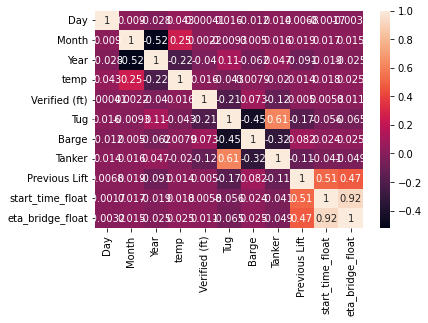

In [42]:
import seaborn as sns
corr = df_model.corr()
sns.heatmap(corr,annot=True)

In [43]:
df_model.drop(columns=['Start Time','ETA Bridge'],inplace=True)

In [44]:
df_model.dtypes

Day                   int64
Month                 int64
Year                  int64
temp                float64
Verified (ft)       float64
Tug                   int32
Barge                 int32
Tanker                int32
Previous Lift         int64
start_time_float    float64
eta_bridge_float    float64
dtype: object

In [45]:
x = df_model.drop(['start_time_float'],axis=1)
#x = np.array(df_model['eta_bridge_float']).reshape(-1,1)
y = df_model['start_time_float']

x.shape,y.shape

((2871, 10), (2871,))

In [46]:
x_train ,x_test, y_train , y_test = train_test_split(x , y , test_size = 0.2 , random_state =1)

In [47]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((2296, 10), (2296,), (575, 10), (575,))

##### Linear regression

In [48]:
lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred_lr = lr.predict(x_test)
(mse(y_test,y_pred_lr))

4.525957912617438

In [49]:
lr.score(x_test,y_test)

0.8567763725755592

In [50]:
y_pred_lr,y_test

(array([ 7.5067653 , 14.5445408 , 15.3248646 , 15.02711889, 14.32586727,
        14.46542631, 10.7991964 , 15.99666562, 17.19964954, 11.40442328,
        11.11663869, 22.12791476,  7.77173153, 12.06735089,  7.17858693,
        14.39672189, 18.41911997, 10.38784386,  1.01654663, 12.10763501,
         5.94153802, 14.41093207, 20.82142953,  5.20725757,  7.94188727,
        10.40676799,  1.63495495,  4.50885533,  6.38226661,  6.92995648,
        13.7677676 , 13.62985198, 13.18456624,  7.57982199, 17.04170771,
        17.56774205, 13.70814661,  1.02550598, 12.60173392, 16.65328757,
        19.13261139, 18.52118775, 17.87296429, 13.3809876 , 16.53677848,
        19.06673977, 15.3549269 , 16.62443574, 17.31836992,  3.8464939 ,
        10.14018503,  2.04331207,  8.43587235, 17.73907253, 13.12080697,
         7.61827616, 16.86582067, 12.32295493, 11.47472515, 12.82187029,
         6.84513023, 13.89259397, 10.95196416, 10.2316926 , 15.2597889 ,
         9.54763116,  6.57814627,  5.33920598, 17.3

In [51]:
import statsmodels.api as sm
X2 = sm.add_constant(x_train)
est = sm.OLS(y_train, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:       start_time_float   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     1434.
Date:                Tue, 08 Mar 2022   Prob (F-statistic):               0.00
Time:                        17:55:51   Log-Likelihood:                -5045.4
No. Observations:                2296   AIC:                         1.011e+04
Df Residuals:                    2285   BIC:                         1.018e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             -198.1820    144.362  

In [52]:
# TODO: 
#Clean up Direction column, it seems the predict error is affected whereh OUT is lower than IN.
 

# COMPLETE:
#1. Figure out the condition for 2 hr notice column (cut off is 1 hour as per Formula in the Excel Sheet)
#3 Incorporate the weather as a feature (Using df.merge())
#5 Split Vessel(s) columns into 3 different columns (completed)
#2. Split up the datetime in Start datetime into day, month and year

## Testing Stuff

In [53]:
top_ten_vessel_index = df_time.groupby('Vessel(s)')['Vehicle  ID'].count().sort_values(ascending=False).reset_index().loc[:9,'Vessel(s)'].values
df_time[df_time['Vessel(s)'].isin(top_ten_vessel_index)]

,Vehicle ID,Lift ID,Vessel(s),ETA Bridge,Direction,Email Sent,Advanced Notice,2 Hours Notice?,Start Time,End Time,...,Year,datetime,temp,timehour,Predicted (ft),Verified (ft),Tug,Barge,Tanker,Previous Lift
Start Time,,,,,,,,,,,,,,,,,,,,,
2019-05-06 15:12:00,19002,NaN,1 TUG / BARGE,2019-05-06 15:30:00,IN,2019-05-06 05:56:00,9:34,ACCEPTABLE,2019-05-06 15:12:00,2019-05-06 15:30:00,...,2019,2019-05-06,52.4,2019-05-06 15,6.859,7.52,1,1,0,0
2019-05-06 16:02:00,19002,NaN,1 TUG,2019-05-06 16:30:00,OUT,2019-05-06 05:56:00,10:34,ACCEPTABLE,2019-05-06 16:02:00,2019-05-06 16:20:00,...,2019,2019-05-06,52.4,2019-05-06 16,8.758,9.49,1,0,0,1
2019-05-07 17:52:00,19002,NaN,1 TUG,2019-05-07 18:30:00,IN,2019-05-07 04:08:00,14:22,ACCEPTABLE,2019-05-07 17:52:00,2019-05-07 18:06:00,...,2019,2019-05-07,60.1,2019-05-07 17,9.066,9.49,1,0,0,0
2019-05-07 18:25:00,19002,NaN,1 TUG / BARGE,2019-05-07 19:00:00,OUT,2019-05-07 04:08:00,14:52,ACCEPTABLE,2019-05-07 18:25:00,2019-05-07 18:38:00,...,2019,2019-05-07,60.1,2019-05-07 18,9.622,10.07,1,1,0,1
2019-05-07 18:55:00,19003,NaN,1 TUG / BARGE,2019-05-07 19:45:00,IN,2019-05-07 04:08:00,15:37,ACCEPTABLE,2019-05-07 18:55:00,2019-05-07 19:10:00,...,2019,2019-05-07,60.1,2019-05-07 18,9.622,10.07,1,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-10 05:30:00,20440,2876.0,3 TUGS / TANKER,2021-08-10 05:35:00,OUT,2021-08-10 05:13:00,0:22,TOO LATE,2021-08-10 05:30:00,2021-08-10 05:45:00,...,2021,2021-08-10,70.5,2021-08-10 05,10.589,11.08,3,0,3,0
2021-08-10 06:35:00,20441,2877.0,1 TUG / BARGE,2021-08-10 07:05:00,IN,2021-08-10 05:13:00,1:52,ACCEPTABLE,2021-08-10 06:35:00,2021-08-10 06:52:00,...,2021,2021-08-10,70.5,2021-08-10 06,9.867,10.27,1,1,0,1
2021-08-10 07:19:00,20441,2878.0,1 TUG / BARGE,2021-08-10 07:40:00,OUT,2021-08-10 05:13:00,2:27,ACCEPTABLE,2021-08-10 07:19:00,2021-08-10 07:40:00,...,2021,2021-08-10,70.5,2021-08-10 07,8.131,8.38,1,1,0,2


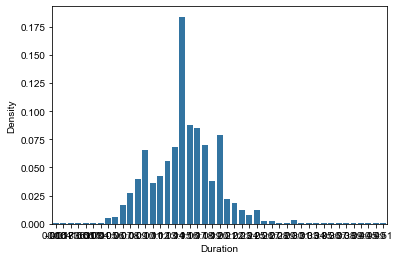

In [54]:
import seaborn as sns
import matplotlib as plt
from matplotlib import rcParams

d = (df_time['Duration'].value_counts()/len(df_time))\
    .reset_index().sort_values('index')
d.rename(columns={'index':"Duration","Duration":"Density"},inplace=True)
sns.barplot(data=d,x='Duration',y='Density',color='tab:blue')
sns.set(rc={'figure.figsize':(20,5)})


In [55]:
df = pd.read_csv("Chelsea Data Fix.csv", encoding= 'unicode_escape',skiprows=1)
df = df.loc[:, ['Vehicle  ID', 'Lift ID', 'Vessel(s)', 'ETA Bridge', 'Direction',
       'Email Sent', 'Advanced Notice', '2 Hours Notice?', 'Notes',
       'Start Time', 'End Time', 'Duration', 'Direction.1', 'Vessel(s).1']].copy()           

In [56]:
df_time['Total Vessels']=df_time['Tug']+df_time['Barge']+df_time['Tanker']
df_time.loc[:,['Year',"Month",'Day']].head(7)

,Year,Month,Day
Start Time,,,
2019-05-06 15:12:00,2019,5,6
2019-05-06 16:02:00,2019,5,6
2019-05-07 17:52:00,2019,5,7
2019-05-07 18:25:00,2019,5,7
2019-05-07 18:55:00,2019,5,7
2019-05-07 20:05:00,2019,5,7
2019-05-08 18:37:00,2019,5,8


In [57]:
df_time['Duration']=pd.to_datetime(df_time['Duration'],errors='coerce')

In [58]:
df_time['Predict Error'] = df_time['Predict Error'].dt.total_seconds()/60

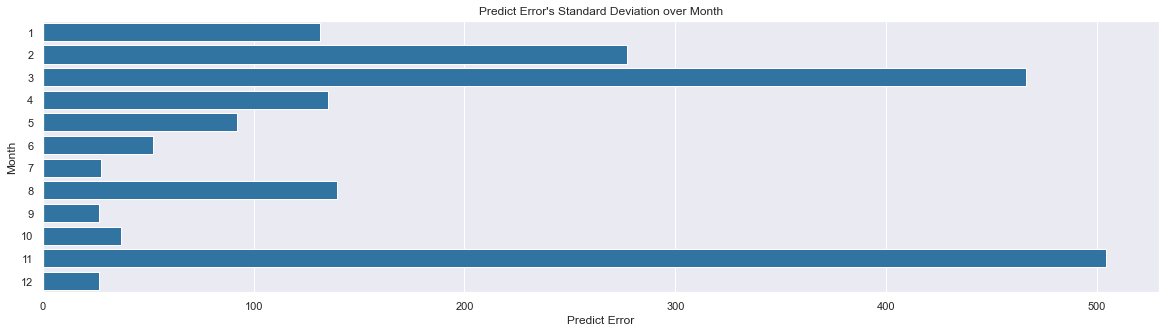

In [59]:
d1 = df_time.groupby('Month')['Predict Error'].std().reset_index()
barp = sns.barplot(data=d1,x='Predict Error',y='Month',color='tab:blue',orient='h')
barp.set(title='Predict Error\'s Standard Deviation over Month')
sns.set(rc={'figure.figsize':(12,5)})

In [60]:
pd.Series(np.where(df_time['ETA Bridge']-df_time['Email Sent']>'01:00:00','Acceptable','Too Late')).value_counts()

Acceptable    2810
Too Late        61
dtype: int64

In [61]:
(df_time['ETA Bridge']-df_time['Email Sent']).describe()

count                          2869
mean      0 days 15:43:19.825723248
std      11 days 19:35:56.411834208
min               -1 days +04:02:00
25%                 0 days 02:51:00
50%                 0 days 04:46:00
75%                 0 days 08:23:00
max               366 days 02:15:00
dtype: object

In [62]:
df_time['2 Hours Notice?'].value_counts()

ACCEPTABLE    2814
TOO LATE        57
Name: 2 Hours Notice?, dtype: int64

In [63]:
np.where(df_time['ETA Bridge']-df_time['Email Sent']>'02:00:00',0,1).sum()

373